# Análise Exploratória de Dados - Consumidor.gov



### Sobre o Consumidor.gov
A plataforma Consumidor.gov foi desenvolvida pela Secretaria Nacional do Consumidor, do Ministério da Justiça, e é monitorada pelos Procons, Defensorias Públicas, Ministérios Públicos, Agências Reguladoras, entre outros órgãos públicos.

O Consumidor.gov.br é um serviço público e gratuito que permite a interlocução direta entre consumidores e empresas para solução alternativa de conflitos de consumo pela internet. Através da plataforma as empresas se comprometem a receber, analisar e responder as reclamações dos consumidores em até 10 dias. 

Após a resposta da empresa o consumidor tem até 20 dias para avaliar a empresa e informar se a reclamação foi ou não resolvida e indicar seu nível de satisfação através de uma nota que varia de 1 a 5. 

**A plataforma não substitui o serviço prestado pelos Órgãos de Defesa do Consumidor então caso o consumidor não consiga resolver seu problema pode procurar os devidos órgãos como outra alternativa.**

Para conhecer mais sobre a plataforma você pode acessar o link https://www.consumidor.gov.br/pages/conteudo/publico/1.

### Motivação da Análise
A motivação para a realização desta Análise Exploratória de Dados é colocar em prática os conhecimentos adquiridos em Análise de Dados, Estatística Descritiva, Python e ETL de Dados.

Para isso busquei em fontes de dados abertas um dataset que pudesse aplicar meus conhecimentos além de desenvolver novas habilidades em análise de dados. O dataset escolhido foram as reclamações finalizadas no portal Consumidor.gov no primeiro trimestre de 2014, abrangendo o período de Janeiro a Março.

### Sobre os Dados
Conforme informado anteriormente os dados se referem às reclamações finalizadas no portal Consumidor.gov no primeiro trimestre de 2024 e estão apresentados no formato csv. Foram coletados no endereço https://www.consumidor.gov.br/pages/dadosabertos/externo/.

O dataset original possui 19 colunas mas após passar pelo processo de ETL ([acesse o notebook com o ETL](etl.ipynb)) chegamos a uma base final com 10 colunas e 325643 registros únicos. 

Sobre as colunas:
- **uf**: apresenta a UF onde a reclamação foi registrada;
- **sexo**: representado por M para masculino, F para feminino e O para outros;
- **faixa_etaria**: apresenta a faixa etária do consumidor;
- **tempo_resposta**: apresenta o tempo de resposta da empresa para a reclamação. Pode variar de 0 a 10 dias;
- **nome_fantasia**: apresenta o nome fantasia das empresas; 
- **segmento_de_mercado**: apresenta o segmento de mercado no qual a empresa está inserida;
- **como_comprou_contratou**: apresenta por qual canal o consumidor adquiriu o produto da empresa;
- **procurou_empresa**: informa se o consumidor procurou a empresa antes de realizar a reclamação no portal;
- **avaliacao_reclamacao**: apresenta o status da reclamação como  avaliada, não avaliada ou resolvida;
- **nota_do_consumidor**: apresenta a nota do consumidor de 1 a 5. A nota 0 significa que a empresa não foi avaliada pelo consumidor e não é contabilizada no cálculo de nota média das empresas e segmentos.


### Perguntas a serem respondidas

A fim de guiar esta análise foram feitas as seguintes perguntas:

- Como é a distribuição das reclamações pelo país?
- Quais os segmentos com maior número de reclamações?
- Qual o perfil dos consumidores?
- Qual o tempo médio de resposta por segmento?
- Quais as empresas com mais reclamações e sua nota média de avaliação dos clientes?
- Há relação entre a nota de avaliação e o tempo de resposta?

### Leitura dos dados

In [1]:
# importando as bibliotecas que serão utilizadas para a análise
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# importando a base de dados que tratamos no ETL
df = pd.read_csv('dados/base_final.csv')

In [3]:
# verificando se os dados foram importados corretamente
df.head()

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0
1,BA,F,entre 31 a 40 anos,10.0,iFood,Empresas de Intermediação de Serviços / Negócios,Internet,S,Não Avaliada,0.0
2,BA,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Telefone,S,Não Avaliada,0.0
3,PE,F,entre 61 a 70 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Loja física,S,Não Avaliada,0.0
4,PE,F,entre 51 a 60 anos,10.0,Banco BMG,"Bancos, Financeiras e Administradoras de Cartão",Loja física,S,Não Avaliada,0.0


### Análises

Iniciamos a análise verificando os tipos de dados e colunas do nosso dataframe bem como a contagem de valores não nulos para ter certeza que os dados estão consistentes e prontos para serem analisados. Para isso foi usado o método `info()`.

In [4]:
# verificando os tipos de dados do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325643 entries, 0 to 325642
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   uf                      325643 non-null  object 
 1   sexo                    325643 non-null  object 
 2   faixa_etaria            325643 non-null  object 
 3   tempo_resposta          325643 non-null  float64
 4   nome_fantasia           325643 non-null  object 
 5   segmento_de_mercado     325643 non-null  object 
 6   como_comprou_contratou  325643 non-null  object 
 7   procurou_empresa        325643 non-null  object 
 8   avaliacao_reclamacao    325643 non-null  object 
 9   nota_do_consumidor      325643 non-null  float64
dtypes: float64(2), object(8)
memory usage: 24.8+ MB


### Distribuição pelo país

Vamos começar as análises verificando como as reclamações estão distribuídas pelo país.

In [6]:
# criando um df para as reclamaçoes por estado
rec_estado = df['uf'].value_counts().reset_index()
rec_estado.columns = ['estado', 'num reclamações']

# calculando a distribuição percentual das reclamações por estado
total_reclamacoes = len(df)
rec_estado['percentual reclamações'] = ((rec_estado['num reclamações']/total_reclamacoes) * 100).round(2)

rec_estado

,estado,num reclamações,percentual reclamações
0,SP,79000,24.26
1,MG,39696,12.19
2,RJ,35178,10.80
3,PR,26331,8.09
4,BA,17921,5.50
5,RS,15963,4.90
6,DF,15559,4.78
7,SC,14705,4.52
8,GO,10474,3.22
9,CE,9374,2.88


Observamos que somente o estado de São Paulo já apresenta 79000 reclamações finalizadas no primeiro trimestre de 2024 correspondendo a cerca de 24% das reclamações totais. 

Verificamos também que seguido temos outros dois estados da região sudeste com Minas Gerais e Rio de Janeiro respectivamente completando o Top 3 do ranking de reclamações e se somarmos com as reclamações do Espírito Santo temos **50,21%** das reclamações do país concentradas na região sudeste.

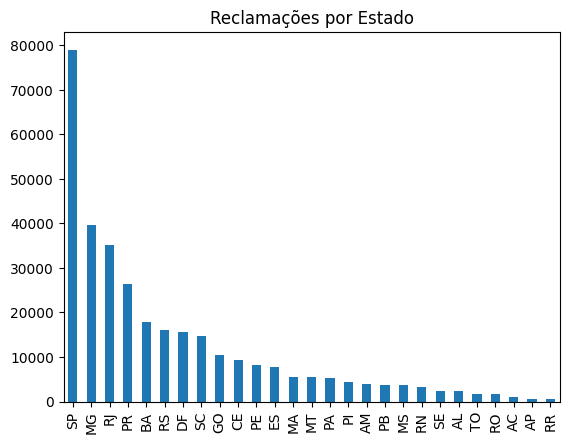

In [7]:
# gerando o gráfico de reclamações por estado
df['uf'].value_counts().plot.bar()
plt.title('Reclamações por Estado')
plt.xlabel(None)
plt.show()

### Reclamações por segmento

Vamos verificar agora quais os segmentos com maior número de reclamações. Para isso vamos utilizar os 10 segmentos que apresentaram maior concentração de reclamações no portal Consumidor.gov.

In [8]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0


In [9]:
# calculando os 10 segmentos com mais reclamacoes
reclamacoes_segmento = df['segmento_de_mercado'].value_counts().reset_index()
reclamacoes_segmento.columns = ['segmento', 'num_reclamacoes']

# calculando também os valores percentuais e percentuais acumulados de reclamações
reclamacoes_segmento['percentual_reclamacoes'] = (reclamacoes_segmento['num_reclamacoes']/total_reclamacoes) * 100
reclamacoes_segmento['percentual_acumulado'] = (reclamacoes_segmento['num_reclamacoes'].cumsum()/reclamacoes_segmento['num_reclamacoes'].sum()) * 100

top10_segmentos = reclamacoes_segmento.nlargest(10, 'num_reclamacoes')
top10_segmentos

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado
0,"Bancos, Financeiras e Administradoras de Cartão",90133,27.678470,27.678470
1,"Operadoras de Telecomunicações (Telefonia, Int...",41873,12.858560,40.537030
2,Comércio Eletrônico,23775,7.300940,47.837970
3,Transporte Aéreo,21537,6.613684,54.451654
4,"Viagens, Turismo e Hospedagem",17981,5.521691,59.973345
5,Provedores de Conteúdo e Outros Serviços na In...,16640,5.109890,65.083235
6,Energia Elétrica,15634,4.800963,69.884198
7,Empresas de Intermediação de Serviços / Negócios,11291,3.467294,73.351492
8,"Seguros, Capitalização e Previdência",10990,3.374861,76.726354
9,Empresas de Pagamento Eletrônico,10783,3.311295,80.037649


Observamos que o segmento com maior concentração de reclamações é o de **Bancos, Financeiras e Administradoras de Cartão** com mais de **90 mil** reclamações, seguido de **Operadoras de Telecomunicações** e **Comércio Eletrônico**. Estes três segmentos representam quase metade das reclamações registradas com **47.83%** do total. 

Também é possível notar que o Top 10 abrange 80% das reclamações registradas.

Para melhor visualização no gráfico iremos renomear o segmento **Operadoras de Telecomunicações (Telefonia, Internet, Tv por assinatura)**.

In [10]:
# renomenando o segmento 
top10_segmentos.loc[1, 'segmento'] = 'Operadoras de Telecomunicações'

Abaixo podemos visualizar o gráfico que representa os Top 10 segmentos por número de reclamações.

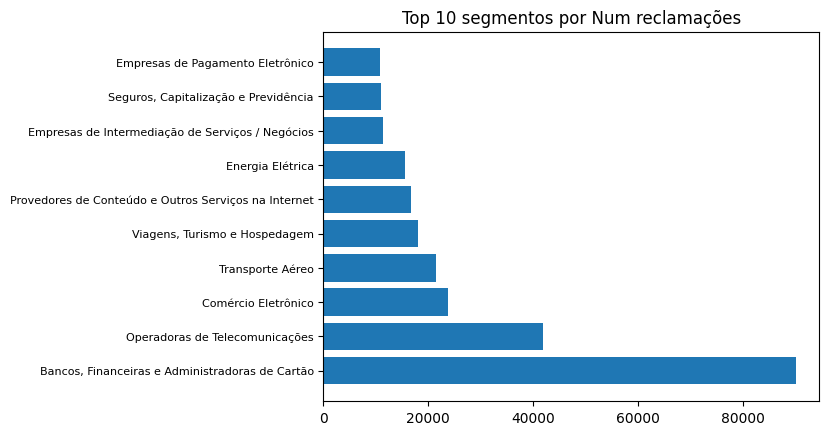

In [11]:
# criando um gráfico de barras horizontais
plt.barh(top10_segmentos['segmento'], top10_segmentos['num_reclamacoes'])
plt.title('Top 10 segmentos por Num reclamações')
plt.yticks(top10_segmentos.index, top10_segmentos['segmento'], ha='right', fontsize=8)
plt.xlabel(None)
plt.show()

### Reclamações por empresa

Agora serão analidas as 10 empresas com maior número de reclamações bem como suas notas médias de avaliação dadas pelos consumidores.

In [12]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0


Ao calcular o número de reclamações por empresa e extrair o Top 10 temos que a **Vivo - Telefônica** foi a empresa com o maior número de reclamações com quase **11 mil** seguidos por **Google** e **Hurb - Hotel Urbano**.

In [13]:
# calculando as 10 empresas com mais reclamações
reclamacoes_empresas = df['nome_fantasia'].value_counts().reset_index()
reclamacoes_empresas.columns = ['nome_fantasia', 'num_reclamacoes']

top10_empresas = reclamacoes_empresas.nlargest(10, 'num_reclamacoes')
top10_empresas

,nome_fantasia,num_reclamacoes
0,Vivo - Telefônica,10924
1,Google,10482
2,Hurb - Hotel Urbano,10174
3,Claro Celular,8571
4,Tim,7673
5,Claro Residencial,7424
6,Caixa Econômica Federal,6822
7,Latam Airlines (Tam),6628
8,Banco Santander,6410
9,Banco Bradesco,6152


Agora iremos calcular as notas médias das empresas. Para isso primeiro iremos filtrar as notas entre 1 e 5 pois as notas 0 representam que as empresas não foram avaliadas e não devem ser contabilizadas.

In [14]:
# Calculando a nota média das empresas
# Filtrando as notas no intervalo de 1 a 5
df_notas = df[(df['nota_do_consumidor'] >= 1) & (df['nota_do_consumidor'] <= 5)]

# Calculando a média das notas para cada empresa
media_notas = df_notas.groupby('nome_fantasia')['nota_do_consumidor'].mean().round(2).sort_values(ascending=False).reset_index()

media_notas

,nome_fantasia,nota_do_consumidor
0,UP.P,5.0
1,Crefisa Seguros,5.0
2,Santista,5.0
3,Seguradora Líder dos Consórcios do Seguro DPVAT,5.0
4,Senac - Santa Catarina,5.0
...,...,...
924,Dog Life,1.0
925,Universidade Anhembi Morumbi,1.0
926,Brooksfield Donna,1.0
927,Unimed do Ceará,1.0


Agora será necessário realizar o merge dos dataframes do número de reclamações e notas médias para podermos comparar quais as notas médias do Top 10 empresas com mais reclamações.

In [15]:
# Realizando a junção dos dataframes para construir a tabela final
rec_empresas_final = pd.merge(top10_empresas, media_notas, on='nome_fantasia', how='left')
rec_empresas_final

,nome_fantasia,num_reclamacoes,nota_do_consumidor
0,Vivo - Telefônica,10924,4.04
1,Google,10482,3.42
2,Hurb - Hotel Urbano,10174,1.15
3,Claro Celular,8571,3.72
4,Tim,7673,3.87
5,Claro Residencial,7424,3.56
6,Caixa Econômica Federal,6822,3.07
7,Latam Airlines (Tam),6628,3.89
8,Banco Santander,6410,2.26
9,Banco Bradesco,6152,2.26


Com nosso dataframe final das reclamações por empresa podemos observar que apesar de ter muitos registros de reclamações a **Vivo também possui uma nota acima de 4.0** o que nos leva a crer que os consumidores estão mais satisfeitos com o atendimento da empresa bem como a resolução dos problemas registrados na plataforma. 

Também é possível observar que dentro do Top 10 a empresa que possui a **menor nota é a Hurb** com a **nota 1.15** e a maioria das empresas possui notas acima de 3.0.

C:\Users\amori\AppData\Local\Temp\ipykernel_6568\4139017680.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(x, rotation=45, ha='right')


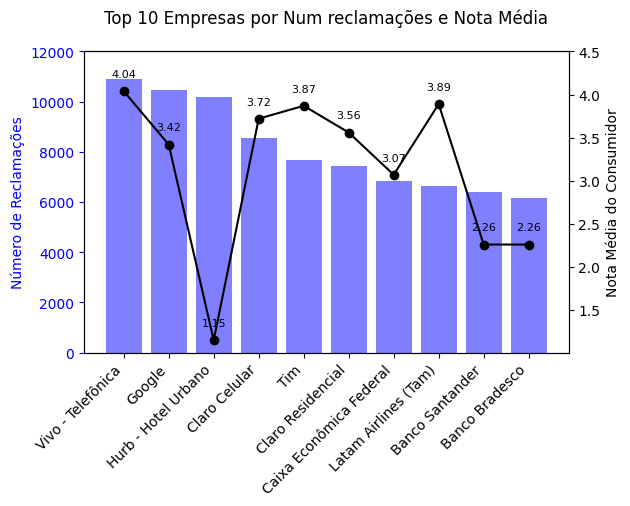

In [76]:
# Plotando gráfico com o top 10 empresas por número de reclamações e suas notas médias
# Definindo as barras
x = rec_empresas_final['nome_fantasia']
y1 = rec_empresas_final['num_reclamacoes']

# Definindo a linha
y2 = rec_empresas_final['nota_do_consumidor']

# Criando subplot
fig, ax1 = plt.subplots()

# Criando o gráfico de barras
ax1.bar(x, y1, color='b', alpha=0.5)
ax1.set_ylabel('Número de Reclamações', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(x, rotation=45, ha='right')
ax1.set_ylim(top=12000)

# Criando o segundo eixo y para a linha
ax2 = ax1.twinx()
ax2.plot(x, y2, color='black', marker='o')
ax2.set_ylabel('Nota Média do Consumidor', color='black')
ax2.tick_params('y', colors='black')
ax2.set_ylim(top=4.5)
for i, txt in enumerate(y2):
    ax2.annotate(txt, (x[i], y2[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Ajustando o layout
fig.tight_layout()

plt.title('Top 10 Empresas por Num reclamações e Nota Média', pad=20)
plt.show()

### Tempo médio de resposta por segmento

Agora será analisado o tempo médio de resposta por segmento de mercado para observar qual segmento mais e menos ágil na resolução das reclamações com os consumidores. O tempo que as empresas possuem para responder os clientes é de até 10 dias.

Também faremos um Top 10 dos segmentos com mais reclamações mostrando o tempo médio de cada um.

In [51]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0


Após realizar o cálculo temos uma lista com o tempo médio de resposta de todos os segmentos.

In [52]:
# calculando o tempo médio de atendimento
tm_segmento = df.groupby('segmento_de_mercado')['tempo_resposta'].mean().round(2).sort_values(ascending=False).reset_index()
tm_segmento.columns = ['segmento', 'tempo_resposta']
tm_segmento

,segmento,tempo_resposta
0,Provedores de Conteúdo e Outros Serviços na In...,7.93
1,"Operadoras de Telecomunicações (Telefonia, Int...",7.87
2,Serviços Esportivos,7.40
3,Supermercados,7.34
4,Aluguel de Carros,7.30
5,Operadoras de Planos de Saúde e Administradora...,7.30
6,Varejo,7.12
7,Comércio Eletrônico,7.08
8,Editoras e Veículos de Imprensa,6.88
9,"Construtoras, Incorporadoras e Imobiliárias",6.81


In [53]:
# renomeando o segmento para melhor visualização no gráfico
tm_segmento.loc[1, 'segmento'] = 'Operadoras de Telecomunicações'

Resgataremos o dataframe criado anteriormente com o Top 10 segmentos em número de reclamações e feremos um merge para adicionar os tempos médios ao dataframe.

In [54]:
top10_segmentos

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado
0,"Bancos, Financeiras e Administradoras de Cartão",90133,27.678470,27.678470
1,Operadoras de Telecomunicações,41873,12.858560,40.537030
2,Comércio Eletrônico,23775,7.300940,47.837970
3,Transporte Aéreo,21537,6.613684,54.451654
4,"Viagens, Turismo e Hospedagem",17981,5.521691,59.973345
5,Provedores de Conteúdo e Outros Serviços na In...,16640,5.109890,65.083235
6,Energia Elétrica,15634,4.800963,69.884198
7,Empresas de Intermediação de Serviços / Negócios,11291,3.467294,73.351492
8,"Seguros, Capitalização e Previdência",10990,3.374861,76.726354
9,Empresas de Pagamento Eletrônico,10783,3.311295,80.037649


In [55]:
# realizando o merge para adicionar os tempos médios ao df do top 10 segmentos
tm_top10 = pd.merge(top10_segmentos, tm_segmento, on='segmento', how='left')
tm_top10

,segmento,num_reclamacoes,percentual_reclamacoes,percentual_acumulado,tempo_resposta
0,"Bancos, Financeiras e Administradoras de Cartão",90133,27.678470,27.678470,6.54
1,Operadoras de Telecomunicações,41873,12.858560,40.537030,7.87
2,Comércio Eletrônico,23775,7.300940,47.837970,7.08
3,Transporte Aéreo,21537,6.613684,54.451654,4.83
4,"Viagens, Turismo e Hospedagem",17981,5.521691,59.973345,3.04
5,Provedores de Conteúdo e Outros Serviços na In...,16640,5.109890,65.083235,7.93
6,Energia Elétrica,15634,4.800963,69.884198,6.21
7,Empresas de Intermediação de Serviços / Negócios,11291,3.467294,73.351492,6.60
8,"Seguros, Capitalização e Previdência",10990,3.374861,76.726354,6.39
9,Empresas de Pagamento Eletrônico,10783,3.311295,80.037649,6.69


Entre o Top 10 observamos que o segmento mais rápido a responder os clientes é o de **Viagens, Turismo e Hospedagem com um tempo médio de 3.04 dias** e o segmento que demora mais para responder os clientes é o **Provedores de Conteúdo e Outros Serviços na Internet com 7.93 dias**.

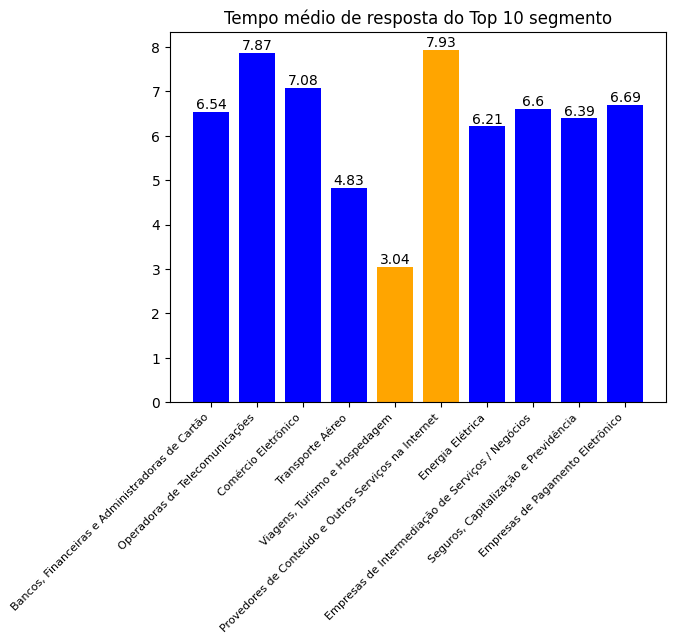

In [56]:
# plotando gráfico de tempo médio de resposta para o top 10 segmentos em reclamações.

cores = ['blue' if i not in [4, 5] else 'orange' for i in range(len(tm_top10))]

plt.bar(tm_top10['segmento'], tm_top10['tempo_resposta'], color=cores)
plt.title('Tempo médio de resposta do Top 10 segmento')
plt.xticks(fontsize=8, rotation=45, ha='right')
for i, valor in enumerate(tm_top10['tempo_resposta']):
    plt.annotate(str(valor), xy=(i, valor), ha='center', va='bottom')
plt.show()

### Perfil dos consumidores

Para o perfil dos consumidores iremos fazer uma análise de distribuição por gênero, faixa etária e como o consumidor adquiriu o serviço das empresas bem como se entrou em contato com as empresas antes de registrarem a reclamação na plataforma do Consumidor.gov.

In [57]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0


##### Distribuição por faixa etária

Em relação a faixa etária os consumidores estão concentrados em sua maioria na **faixa de 31 a 40 anos com 116456 reclamações** representando aproximadamente **36%** do total de reclamações.

**Também é possível notar que cerca de 82% dos consumidores estão abaixo dos 50 anos.** Uma hipótese para este resultado é a de que pessoas mais jovens tem mais facilidade com tecnologia e acabam recorrendo a serviços vituais como a plataforma Consumidor.gov para registro de reclamações.

In [58]:
rec_idade = df.faixa_etaria.value_counts().reset_index()
total_rec = len(df)
rec_idade.columns = ['faixa_etaria', 'num_reclamacoes']
rec_idade['percentual'] = ((rec_idade.num_reclamacoes/total_rec) * 100).round(2)
rec_idade


,faixa_etaria,num_reclamacoes,percentual
0,entre 31 a 40 anos,116456,35.76
1,entre 21 a 30 anos,77154,23.69
2,entre 41 a 50 anos,70487,21.65
3,entre 51 a 60 anos,31427,9.65
4,entre 61 a 70 anos,19200,5.90
5,mais de 70 anos,7101,2.18
6,até 20 anos,3818,1.17


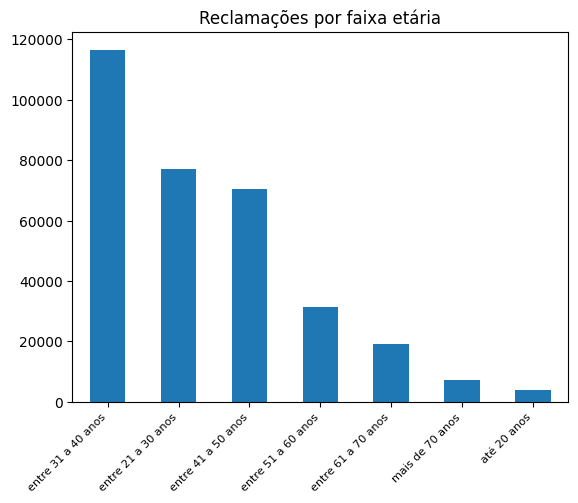

In [59]:
# plotando o gráfico de reclamações por faixa etária
df.faixa_etaria.value_counts().plot.bar()
plt.title('Reclamações por faixa etária')
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel(None)
plt.show()

##### Distribuição por sexo

Para sexo iremos verificar como as reclamações se distribuem entre masculino, feminino e outros (que engloba as demais identidades de sexo).

**Observa-se uma maior concentração de reclamações para o sexo masculino com 59% das reclamações totais.**

In [75]:
# calculando o número de reclamações por gênero
rec_sexo = df.sexo.value_counts().reset_index()
rec_sexo.columns = ['sexo', 'num_reclamacoes']
rec_sexo['percentual'] = (rec_sexo.num_reclamacoes/total_rec) * 100
rec_sexo

,sexo,num_reclamacoes,percentual
0,M,192235,59.032437
1,F,133198,40.903075
2,O,210,0.064488


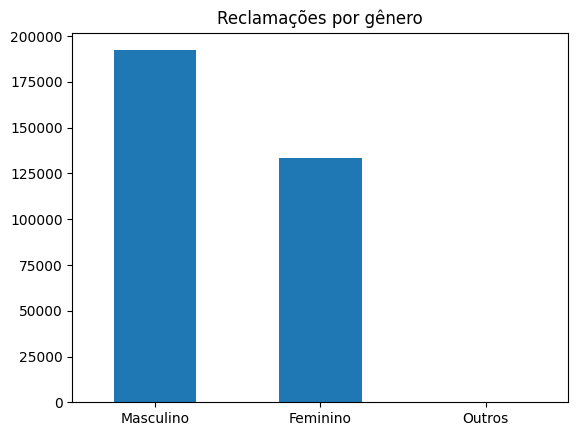

In [61]:
# plotando gráfico de reclamações por gênero
rec_genero.num_reclamacoes.plot.bar()
plt.title('Reclamações por gênero')
plt.xticks(range(len(rec_genero)), ['Masculino', 'Feminino', 'Outros'], rotation=0)
plt.xlabel(None)
plt.show()

##### Distribuição origem compra

Agora vamos analisar quais os canais onde os consumidores adquiram os serviços ou produtos das empresas e que originaram as reclamações registradas no Consumidor.gov.

**Observamos que o principal canal de compras é a Internet com 173810 reclamações, o que corresponde a 53%** do total. 

Uma informação que chama a atenção é que ocupando a segunda posição no ranking, com 57887 reclamações, estão os consumidores que alegam não terem comprado ou contratado o serviço das empresas.

In [62]:
# calculando o número de reclamações por canal e o percentual 
rec_origem = df.como_comprou_contratou.value_counts().reset_index()
rec_origem.columns = ['origem_compra', 'num_reclamacoes']
rec_origem['percentual'] = (rec_origem.num_reclamacoes / total_rec) * 100
rec_origem

,origem_compra,num_reclamacoes,percentual
0,Internet,173810,53.374401
1,Não comprei / contratei,57887,17.776215
2,Loja física,47946,14.723486
3,Telefone,32975,10.126120
4,Domicílio,8007,2.458828
5,SMS / Mensagem de texto,1779,0.546304
6,Catálogo,1312,0.402895
7,Ganhei de presente,1201,0.368809
8,"Stand, feiras e eventos",726,0.222944


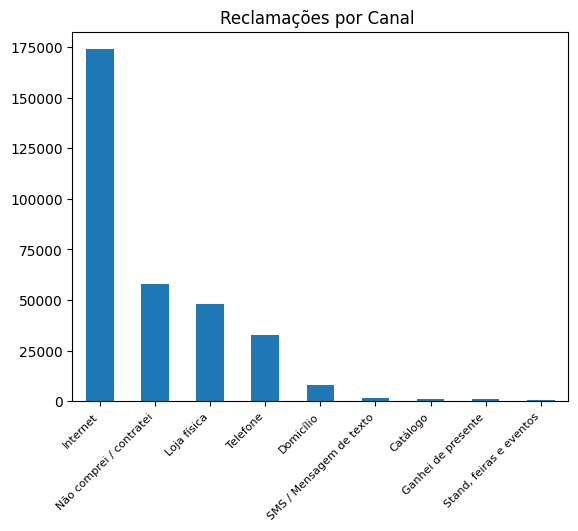

In [64]:
# plotando gráfico das reclamações por canal de vendas
df.como_comprou_contratou.value_counts().plot.bar()
plt.title('Reclamações por Canal')
plt.xticks(rotation=45, fontsize=8, ha='right')
plt.xlabel(None)
plt.show()

##### Distribuição por procura às empresas

Analisando se os consumidores procuraram as empresas através dos seus canais de relacionamento antes de registrarem as reclamações na plataforma Consumidor.gov verificamos que quase **90% dos consumidores já haviam procurado as empresas** antes e como não conseguiram solucionar o problema recorreram à plataforma como nova alternativa.

In [65]:
rec_procura = df.procurou_empresa.value_counts().reset_index()
rec_procura.columns = ['procurou_empresa', 'quantidade']
rec_procura['percentual'] = (rec_procura.quantidade/total_rec) * 100
rec_procura


,procurou_empresa,quantidade,percentual
0,S,287502,88.28748
1,N,38141,11.71252


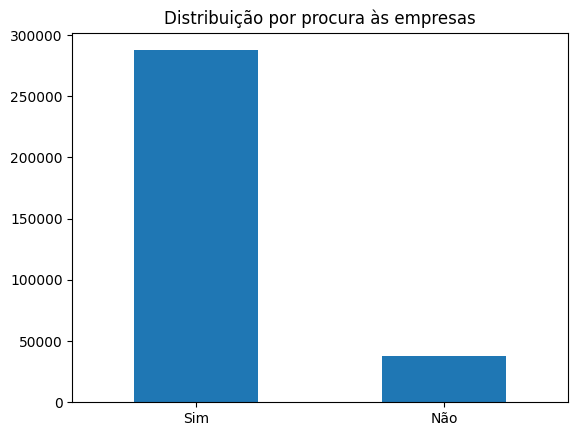

In [66]:
df.procurou_empresa.value_counts().plot.bar()
plt.title('Distribuição por procura às empresas')
plt.xticks(range(len(rec_procura)), ['Sim', 'Não'], rotation=0)
plt.xlabel(None)
plt.show()

### Relação entre tempo de resposta e nota

Por fim vamos verificar se o tempo de resposta tem algum impacto na nota de avaliação dos consumidores para as empresas. 
Com isso poderemos observar se empresas que respondem aos clientes mais rápido possuem melhores avaliações ou se isso não interfere na nota.

In [67]:
df.head(1)

,uf,sexo,faixa_etaria,tempo_resposta,nome_fantasia,segmento_de_mercado,como_comprou_contratou,procurou_empresa,avaliacao_reclamacao,nota_do_consumidor
0,BA,M,entre 31 a 40 anos,10.0,Hipercard,"Bancos, Financeiras e Administradoras de Cartão",Não comprei / contratei,S,Não Avaliada,0.0


Criando um gráfico de correlação entre as variáveis tempo de resposta e nota do consumidor podemos observar que não há qualquer correlação entre as duas variáveis, o que sugere que a empresa responder mais ou menos rápido não interfere nas notas dadas pelos clientes.

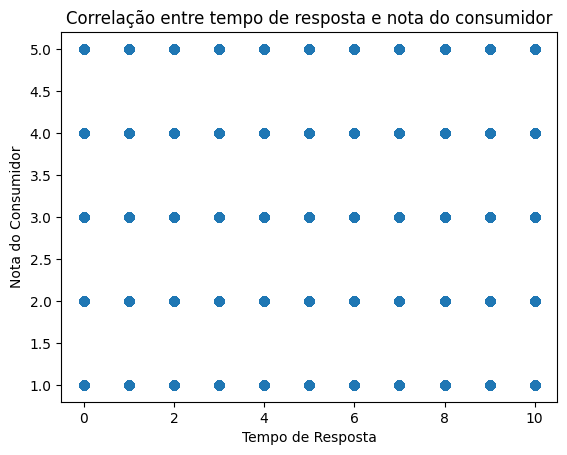

In [68]:
# filtrando o df para usar somente os registros que foram avaliados pelos consumidores (notas de 1 a 5)
df_filtrado = df[(df.nota_do_consumidor >0)]

# criando gráfico de dispersão para verficiar a correlação das duas variáveis
plt.scatter(df_filtrado.tempo_resposta, df_filtrado.nota_do_consumidor)
plt.title('Correlação entre tempo de resposta e nota do consumidor')
plt.xlabel('Tempo de Resposta')
plt.ylabel('Nota do Consumidor')
plt.show()

Realizando o cálculo da correlação das variáveis constatamos o que foi apresentado no gráfico pois temos uma correlação de -0.01.

In [73]:
# calculando correlação 
correlacao = df_filtrado.tempo_resposta.corr(df_filtrado.nota_do_consumidor).round(2)
correlacao

-0.01

Utilizando uma matriz de correlação podemos verificar mais uma vez que as variáveis não possuem correlação.

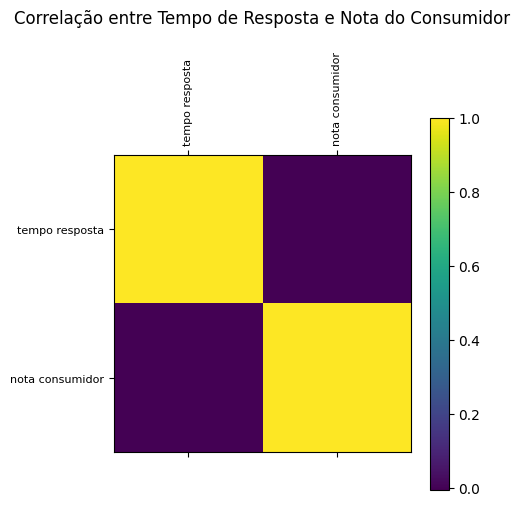

In [72]:
# criando matriz de correlação
plt.matshow(df_filtrado[['tempo_resposta', 'nota_do_consumidor']].corr())
plt.xticks(range(2), ['tempo resposta', 'nota consumidor'], fontsize=8, rotation=90)
plt.yticks(range(2), ['tempo resposta', 'nota consumidor'], fontsize=8)
plt.colorbar()
plt.title('Correlação entre Tempo de Resposta e Nota do Consumidor', pad=20)
plt.show()

### Conclusões

Com esta análise podemos tirar algumas conclusões em realação às reclamações finalizadas no portal Consumidor.gov no primeiro trimesmtre de 2024.

O perfil dos consumidores que realizaram as reclamações é majoritariamente composto por **pessoas de até 50 anos**, com **82%** dos registros no portal, além disso temos a **maior concentração na faixa etária de 31 a 40 anos com 116456 registros** representando 36% do total. Cerca de **59%** das reclamações foram feitas por consumidores do sexo **masculino**.

Quando olhamos para o **canal** onde os consumidores realizaram a aquisição do produto ou serviço podemos observar que **mais da metade está concentrado na Internet** como principal canal de compra e que a segunda origem em número de reclamações são de **consumidores que alegam não terem contratado o produto ou serviço com 17,7% do total de reclamações**. 

Ao verificar se os consumidores procuraram as empresas em seus canais oficiais de comunicação, como SAC ou pessoalmente, temos que **88% já haviam tentado solucionar os problemas** relatados na plataforma antes de entrar com a reclamação no Consumidor.gov.

O estado com maior concentração de reclamações é **São Paulo com 79000 reclamações** finalizadas entre Janeiro e Março de 2024, esse número corresponde a quase um quarto das reclamações do país com 24%. Seguido temos **Minas Gerais** com aproximadamente **39600 reclamações** e **Rio de Janeiro** com aproximadamente **35100 reclamações**. Somando as reclamações do sudeste temos **50%** do total de reclamações do país concentradas nessa região.

Analisando a distribuição de reclamações por **segmento de mercado** temos em primeiro lugar o segmento de **Bancos, Financeiras e Administradoras de Cartões com aproximadamente 90000 reclamações** registradas representando **27,7%** do total. Ainda em relação ao segmento de mercado temos que entre os 10 segmentos com mais reclamações o que **responde as reclamações com mais agilidade** é o de **Viagens, Turismo e Hospedagem** com média de **3,04 dias** e o que leva **mais tempo** para responder as reclamações é o de **Provedores de Conteúdo e Outros Serviços com média de 7,93 dias**.

Quando olhamos para as empresas que possuem mais reclamações registradas temos **Vivo - Telefônica com 10924 registros**, **Google com 10482 registros** e **Hurb - Hotel Hurbano com 10174 registros**. Ao analisar as notas médias das empresas constatamos que apesar da Vivo ser a empresa com mais reclamações no ranking ela também é a empresa que possui **maior nota** no top 10 empresas com **media de 4,04** de um máximo de 5. Já a empresa com a **menor nota** do ranking é a **Hurb com 1,15.** Isso pode sugerir que a Vivo é mais eficiente na resolução do problemas resultando em maior satisfação dos seus consumidores o que já não acontece com a Hurb.

Antes de iniciar as análises foi levantada a hipótese de que a nota de avaliação poderia ter alguma relação com o tempo de resposta da empresa sugerindo que empresas que respondessem os consumidores mais rápido poderiam ter notas mais altas e ao realziar as análises de correlação foi constatado que a **hipótese não é válida** visto que a correlação entre as variáveis tempo de resposta e nota do consumidor é de **-0,01** caracterizando ausência de correlação linear.